In [1]:
#инициализация библиотеки для работы с НС - нужно её кратко описать
import torch

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#инициализация общих библиотек
import numpy as np
import random
from IPython.core.display import Image, display
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100500)

In [4]:
#объявление нужных нам компонерт библиотек
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.autograd import Variable
#import pdb

In [5]:
#функция, которая выведет результаты предсказания для тестового множества
def make_solution_pytorch(net, test_no_classes):
    res = []
    net.eval()
    for data in test_no_classes:
        predict = np.argmax(net.forward(data))
        res.append(predict)
    return res

In [6]:
#функция для расчёта достоверности предсказания
def acc_check(net, validation_X, validation_Y):
    acc = 0.
    net=net.eval()
    outputs = net(Variable(validation_X, volatile=True))
    _, predicted = torch.max(outputs.data, 1)
    predicted.squeeze_()
    y_pred=predicted.cpu().numpy()
    validation_Y=validation_Y.numpy()
    print("sizes: y_pred", y_pred, "valid_y", validation_Y)
    for i in range(validation_X.size(0)):
        if(y_pred == validation_Y[i]):
            acc += 1
    return acc / validation_X.size(0)

In [7]:
#загрузка файла с данными - лучше обсудить этот вопрос со мной отдельно
#all_d = pd.read_csv(r'NASTYA.csv', sep=';', encoding='utf-8', decimal=',')
#all_d = pd.read_excel(r'C:\Jypiter\Data_for_neural_network.xlsx')
all_d = pd.read_excel(r'C:\Jypiter\Data_for_neural_network_2.xlsx')

In [8]:
all_d

,Наименование,X6,X16,X26,X31,X39,Class
0,Абдулинский,20.8,58.5,69,15626,0.1,1.0
1,Адамовский,12.4,93.0,180,23410,1.4,3.0
2,Акбулакский,11.9,39.8,224,9855,0.7,3.0
3,Александровский,13.6,55.0,116,4881,0.2,3.0
4,Асекеевский,17.2,63.5,172,15466,5.3,1.0
5,Беляевский,14.7,50.8,163,12186,0.1,3.0
6,Бугурусланский,19.4,62.0,104,7621,2.1,1.0
7,Бузулукский,18.6,43.4,142,9143,6.2,1.0
8,Гайский,17.7,75.3,77,28919,0.2,1.0
9,Грачевский,15.2,70.4,61,14864,22.2,1.0


In [9]:
#считаем количество возможных классов
num_classes=all_d.groupby('Class')['Наименование'].nunique().shape[0]

In [10]:
all_d.groupby('Class')['Наименование'].nunique().shape[0]

3

In [39]:
#берём объекты, где классы известны, то есть обучающую выборку
train=all_d.loc[['Class']!=0]

KeyError: True

In [12]:
#вычитаем из наших классов 1, так как у нас нумерация классов с 1, а у питона с 0 все числа, соответственно
#он придумвает ещё один класс, которого на самом деле нет
train['Class']=train['Class'].apply(lambda x: x-1)

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
train

,Наименование,X6,X16,X26,X31,X39,Class
0,Абдулинский,20.8,58.5,69,15626,0.1,0.0
1,Адамовский,12.4,93.0,180,23410,1.4,2.0
2,Акбулакский,11.9,39.8,224,9855,0.7,2.0
3,Александровский,13.6,55.0,116,4881,0.2,2.0
4,Асекеевский,17.2,63.5,172,15466,5.3,0.0
5,Беляевский,14.7,50.8,163,12186,0.1,2.0
6,Бугурусланский,19.4,62.0,104,7621,2.1,0.0
7,Бузулукский,18.6,43.4,142,9143,6.2,0.0
8,Гайский,17.7,75.3,77,28919,0.2,0.0
9,Грачевский,15.2,70.4,61,14864,22.2,0.0


In [14]:
#создание тестового множества - множества объектов, у которых класс исходно неизвестен
testt=all_d.ix[(np.isnan(all_d['Class']))]
testt

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Наименование,X6,X16,X26,X31,X39,Class
27,Северный,19.6,98.0,37,10028,5.2,NaN
29,Сорочинский,19.0,98.9,94,7992,13.6,NaN
30,Ташлинский,12.5,71.8,104,20077,7.6,NaN
31,Тоцкий,10.6,31.1,214,6730,1.4,NaN
32,Тюльганский,14.2,111.0,172,9785,0.1,NaN
33,Шарлыкский,16.2,65.7,129,14754,3.3,NaN
34,Ясненский,14.4,87.4,62,16464,1.0,NaN
35,г.Абдулино,16.9,99.5,162,7473,0.2,NaN
36,г.Бугуруслан,15.5,75.2,244,31121,0.3,NaN
38,г.Гай,14.6,103.4,176,107950,1.2,NaN


In [15]:
#удаление ненужных нам столбцов
test2=testt.drop(['Class', 'Наименование'], axis=1)
train2=train.drop(['Наименование'],  axis=1)

In [16]:
#преобразование таблиц с данными в матрицы
train=train2.as_matrix()
test=test2.as_matrix()

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#вытаскивание меток классов
train_X,train_Y = np.hsplit(train, [train.shape[1]-1])

In [18]:
#явное создание матрицы тестового множества
test_X=test

In [19]:
#расчёт среднего и ст отклонения
train_X_mean = train_X.mean(axis=0)
train_X_std = train_X.std(axis=0)

In [20]:
#стандартизация
train_X_tensor = torch.from_numpy( (train_X-train_X_mean)/train_X_std ).float()
train_Y_tensor = torch.from_numpy(train_Y).long()
test_X_tensor = torch.from_numpy( (test_X-train_X_mean)/train_X_std ).float()

In [21]:
#создание валидационной выборки - сделать stratified
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(
    train_X_tensor.numpy(), train_Y_tensor.numpy(), test_size=0.01, random_state=42)

In [22]:
#нейросетевая библиотечка работает только с тензорами - соответсвенно, преобразование матриц в тензоры
X_train=torch.from_numpy(X_train)
X_val=torch.from_numpy(X_val)
Y_train=torch.from_numpy(Y_train)
Y_val=torch.from_numpy(Y_val)

In [23]:
#класс-нейросеть
hidden_neurons=10
class Net(nn.Module):
    #объявляем слои сети
    def __init__(self, dropout=False, batchnorm=False):
        super(Net, self).__init__()
        self.bn1 = nn.BatchNorm1d(X_train.shape[1])#батч-нормализация
        self.fc1 = nn.Linear(X_train.shape[1], hidden_neurons)#первый линейный
        self.act1=nn.Tanh()#сигмоидная активация
        self.drop=nn.Dropout(p=0.25)#дропаут
        self.fc2 = nn.Linear(hidden_neurons, num_classes)#второй линейный
        #int((X_train.shape[1]+num_classes)/2)
        self.act2=nn.Softmax()#активация-софтмакс
        
        for m in self.modules():#инициализиация весов
            if isinstance(m, nn.Linear):#Ксавьер
                in_size=m.in_features
                m.weight.data.normal_(0, np.sqrt(1.0/in_size))

    def forward(self, x):#применение слоёв
        x = self.bn1(x)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.act2(x)
        return x
    
    #L2-регуляризатор
    def L2_loss(self, lambd):
        l2=torch.mul((torch.norm(self.fc1.weight, 2)+\
                      torch.norm(self.fc2.weight, 2)\
                      ), lambd)
        return l2
   
net = Net()

In [24]:
import torch.optim as optim
#выбор функции потерь и оптимизатора - в данном случае кросс-энтропия и стохастический градиентный спуск соответственно
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [25]:
# X_train.size()[0]
0.0/12

0.0

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Do epoch 0 with loss 1.2074331641197205
Do epoch 1 with loss 1.2217024167378743
Do epoch 2 with loss 1.1951496203740437
Do epoch 3 with loss 1.2248648802439372
Do epoch 4 with loss 1.2062619527180989
Do epoch 5 with loss 1.2126169800758362
Do epoch 6 with loss 1.2026951313018799
Do epoch 7 with loss 1.1975475748380024
Do epoch 8 with loss 1.2138149738311768
Do epoch 9 with loss 1.1969285408655803
Do epoch 10 with loss 1.1853086948394775
Do epoch 11 with loss 1.2075521151224773
Do epoch 12 with loss 1.2029582659403484
Do epoch 13 with loss 1.2114325364430745
Do epoch 14 with loss 1.2207657098770142
Do epoch 15 with loss 1.2084365487098694
Do epoch 16 with loss 1.206562062104543
Do epoch 17 with loss 1.227658251921336
Do epoch 18 with loss 1.2179110248883565
Do epoch 19 with loss 1.2063382466634114
Do epoch 20 with loss 1.1791505018870037
Do epoch 21 with loss 1.2092156211535137
Do epoch 22 with loss 1.2196566661198933
Do epoch 23 with loss 1.2138013243675232
Do epoch 24 with loss 1.2145

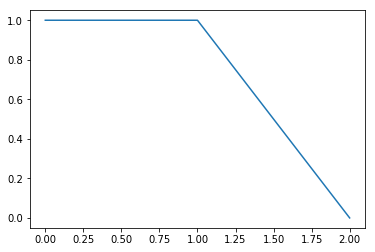

In [26]:
#подбор лучшего размера батча
batch_acc=[]
q1=0
for BATCH_SIZE in [5, 10, 15]:
    net=Net()
    loss_curve=[]
    for epoch in range(50):  # loop over the dataset multiple times
        idx = np.array(list(range(len(X_train))))
        np.random.shuffle(idx)
        running_loss=0.0
        for batch_id in range(X_train.size()[0]//BATCH_SIZE):

            inputs = X_train[torch.LongTensor(idx[batch_id*BATCH_SIZE:(batch_id+1)*BATCH_SIZE])]
            labels = Y_train[torch.LongTensor(idx[batch_id*BATCH_SIZE:(batch_id+1)*BATCH_SIZE])].view(BATCH_SIZE)

            # создаём переменные
            inputs, labels = Variable(inputs), Variable(labels)

            # сбрасываем градиенты
            optimizer.zero_grad()

            # предсказываем
            outputs = net(inputs)
            
            #L2-регуляризация
            l2=net.L2_loss(lambd=1e-5)
            #расчёт функции ошибки
            loss_crit = criterion(outputs, labels)
            loss=loss_crit+l2
            #обратное распространение ошибки
            loss.backward()
            #шаг оптимизатора
            optimizer.step()

            running_loss += loss.data[0]  
            avg_epoch_loss = running_loss / (X_train.size()[0]//BATCH_SIZE)
        print('Do epoch %s with loss %s' % (epoch, avg_epoch_loss ))
        loss_curve.append(avg_epoch_loss)
    q1=acc_check(net, X_val, Y_val)
    batch_acc.append(q1)
    q1=0

plt.plot(batch_acc)
print('Finished Training')

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Do epoch 0 with loss 1.093484878540039
Do epoch 1 with loss 1.0793627103169758
Do epoch 2 with loss 1.098458965619405
Do epoch 3 with loss 1.0953697363535564
Do epoch 4 with loss 1.0969043970108032
Do epoch 5 with loss 1.0977833271026611
Do epoch 6 with loss 1.098046064376831
Do epoch 7 with loss 1.1003398100535076
Do epoch 8 with loss 1.0883026917775471
Do epoch 9 with loss 1.081570307413737
Do epoch 10 with loss 1.0964717467625935
Do epoch 11 with loss 1.085502068201701
Do epoch 12 with loss 1.1077969868977864
Do epoch 13 with loss 1.107130487759908
Do epoch 14 with loss 1.092385172843933
Do epoch 15 with loss 1.0966023604075115
Do epoch 16 with loss 1.0850971539815266
Do epoch 17 with loss 1.0981514851252239
Do epoch 18 with loss 1.0940866072972615
Do epoch 19 with loss 1.088355580965678
Do epoch 20 with loss 1.1070353190104167
Do epoch 21 with loss 1.0975656906763713
Do epoch 22 with loss 1.0838334163029988
Do epoch 23 with loss 1.1014143228530884
Do epoch 24 with loss 1.0928034385

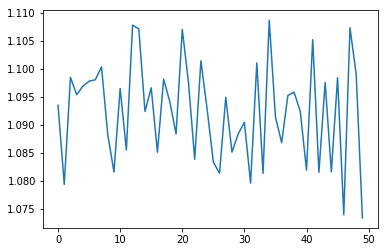

In [27]:
#обучение на лучшем размере батча
best_batch=10
batch_acc=[]
min_loss=1e18
min_epoch=0
q1=0
for BATCH_SIZE in [best_batch]:
    net=Net()
    #net = net.cuda(1)
    loss_curve=[]
    for epoch in range(50):  # loop over the dataset multiple times
        idx = np.array(list(range(len(X_train))))
        np.random.shuffle(idx)
        running_loss = 0.0
        for batch_id in range(X_train.size()[0]//BATCH_SIZE):

            inputs = X_train[torch.LongTensor(idx[batch_id*BATCH_SIZE:(batch_id+1)*BATCH_SIZE])]
            labels = Y_train[torch.LongTensor(idx[batch_id*BATCH_SIZE:(batch_id+1)*BATCH_SIZE])].view(BATCH_SIZE)

            # создаём переменные
            inputs, labels = Variable(inputs), Variable(labels)

            # сбрасываем градиенты
            optimizer.zero_grad()

            # предсказываем
            outputs = net(inputs)
            
            #L2-регуляризация
            l2=net.L2_loss(lambd=1e-5)
            #расчёт функции ошибки
            loss_crit = criterion(outputs, labels)
            loss=loss_crit+l2
            #обратное распространение ошибки
            loss.backward()
            #шаг оптимизатора
            optimizer.step()
            
            #расчёт минимального значения функции ошибки
            if loss.data[0]<min_loss:
                min_loss=loss.data[0]
                min_epoch=epoch
            
            running_loss += loss.data[0]
        avg_epoch_loss = running_loss / (X_train.size()[0]//BATCH_SIZE)
        print('Do epoch %s with loss %s' % (epoch, avg_epoch_loss ))
        loss_curve.append(avg_epoch_loss)
    q1=acc_check(net, X_val, Y_val)
    batch_acc.append(q1)
    q1=0

plt.plot(loss_curve)
print('Finished Training')

In [28]:
print('ОТЧЁТ')
print('1. Признаки, на которых обучаем:')
for k in range(5):
    print(all_d.columns[k+1])
print('2. Количество нейронов входного слоя:', X_train.shape[1])
print('3. Количество нейронов скрытого слоя:', hidden_neurons)
print('4. Количество нейронов выходного слоя:', num_classes)
print('5. Количество эпох:', epoch+1)
print('6. Минимальное значение функции ошибки:', min_loss)
print('Номер соответствующей эпохи:', min_epoch)
print('7. Выходное значение функции ошибки:', loss.data[0])
print('8. Функция активации скрытого слоя:', net.act1)
print('9. Функция активации выходного слоя:', net.act2)
print('10. Архитектура сети:', net)
print('11. Веса W1:', net.fc1.weight.data)
print('12. Веса W2:', net.fc2.weight.data)

ОТЧЁТ
1. Признаки, на которых обучаем:
X6
X16
X26
X31
X39
2. Количество нейронов входного слоя: 5
3. Количество нейронов скрытого слоя: 10
4. Количество нейронов выходного слоя: 3
5. Количество эпох: 50
6. Минимальное значение функции ошибки: 1.0097228288650513
Номер соответствующей эпохи: 9
7. Выходное значение функции ошибки: 1.0798314809799194
8. Функция активации скрытого слоя: Tanh()
9. Функция активации выходного слоя: Softmax()
10. Архитектура сети: Net(
  (bn1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True)
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (act1): Tanh()
  (drop): Dropout(p=0.25)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
  (act2): Softmax()
)
11. Веса W1: 
 0.5800 -0.5265  0.5715 -0.2060  0.5436
 0.5282 -0.4285 -0.1713 -0.1590  0.5284
 0.7761 -0.0489 -0.7521  0.3905 -0.1685
 0.0868 -0.5886  0.3982 -0.6635  0.2095
-0.0528 -0.5338  0.6258  0.0497 -0.1605
 0.6739 -0.5274  0.2515  0.5413  0.2719
-0.2720  0.4435  0.9335  0.3423 -0.

In [29]:
#переключение сети в режим предсказания
net = net.eval()

In [30]:
#применим нейросеть ко всему массиву данных в целях дальнейшего исследования
all_res=all_d.drop(['Class', 'Наименование'], axis=1)

In [31]:
all_res_m=all_res.as_matrix()

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [32]:
all_res_m=(all_res_m-train_X_mean)/train_X_std

In [33]:
all_tensor=torch.from_numpy(all_res_m).float()

In [34]:
#запись результатов сети в переменную
outputs2 = net(Variable(all_tensor, volatile=True))

C:\Programs\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [35]:
_, predicted2 = torch.max(outputs2.data, 1)
torch.add(predicted2.squeeze_(), 1)


 3
 1
 3
 3
 3
 3
 3
 3
 3
 3
 3
 1
 1
 3
 3
 3
 3
 3
 3
 1
 3
 1
 3
 3
 1
 1
 3
 3
 3
 1
 3
 3
 1
 3
 1
 1
 1
 2
 3
 1
 3
 3
 1
 3
 1
 1
 1
[torch.LongTensor of size 47]

In [36]:
#вывод предсказаний в файл
solution = predicted2.tolist()
res_list = []
with open('predictionsd.csv', 'w') as fout:
    print('Id', 'Prediction', sep=';', file=fout)
    for i, prediction in enumerate(solution):
        print(list(all_d['Наименование'])[i], prediction+1, sep=';', file=fout)
        res_list.append((list(all_d['Наименование'])[i], prediction+1))

In [37]:
res_list


[('Абдулинский', 3),
 ('Адамовский', 1),
 ('Акбулакский', 3),
 ('Александровский', 3),
 ('Асекеевский', 3),
 ('Беляевский', 3),
 ('Бугурусланский', 3),
 ('Бузулукский', 3),
 ('Гайский', 3),
 ('Грачевский', 3),
 ('Домбаровский', 3),
 ('Илекский', 1),
 ('Кваркенский', 1),
 ('Красногвардейский', 3),
 ('Кувандыкский', 3),
 ('Курманаевский', 3),
 ('Матвеевский', 3),
 ('Новоорский', 3),
 ('Новосергиевский', 3),
 ('Октябрьский', 1),
 ('Оренбургский', 3),
 ('Первомайский', 1),
 ('Переволоцкий', 3),
 ('Пономаревский', 3),
 ('Сакмарский', 1),
 ('Саракташский', 1),
 ('Светлинский', 3),
 ('Северный', 3),
 ('Соль-Илецкий', 3),
 ('Сорочинский', 1),
 ('Ташлинский', 3),
 ('Тоцкий', 3),
 ('Тюльганский', 1),
 ('Шарлыкский', 3),
 ('Ясненский', 1),
 ('г.Абдулино', 1),
 ('г.Бугуруслан', 1),
 ('г.Бузулук', 2),
 ('г.Гай', 3),
 ('г.Кувандык', 1),
 ('г.Медногорск', 3),
 ('г.Новотроицк', 3),
 ('г.Оренбург', 1),
 ('г.Орск', 3),
 ('г.Соль-Илецк', 1),
 ('г.Сорочинск', 1),
 ('г.Ясный', 1)]